In [2]:
!! pip3 install tensorflow

['Collecting tensorflow',
 '  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/d6/69/d461fa09235326e08b7ca463d5491426fdd4908ef6d3f9ed51d0777dc071/tensorflow-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata',
 '  Downloading tensorflow-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (2.6 kB)',
 'Collecting tensorflow-macos==2.13.0 (from tensorflow)',
 '  Obtaining dependency information for tensorflow-macos==2.13.0 from https://files.pythonhosted.org/packages/f1/cc/6c262ae6f3a23b118b1104fa5f6126067744ffa9226faade202b0a20bdd3/tensorflow_macos-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata',
 '  Downloading tensorflow_macos-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.2 kB)',
 'Collecting absl-py>=1.0.0 (from tensorflow-macos==2.13.0->tensorflow)',
 '  Downloading absl_py-1.4.0-py3-none-any.whl (126 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/126.5 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K 

In [4]:
!! pip3 install tensorflow_hub

['Collecting tensorflow_hub',
 '  Obtaining dependency information for tensorflow_hub from https://files.pythonhosted.org/packages/30/78/9d5292a2b616901bdb075bbf0c777b293f4140bb48108ac2b33fd716c2eb/tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata',
 '  Downloading tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata (1.4 kB)',
 'Requirement already satisfied: numpy>=1.12.0 in /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages (from tensorflow_hub) (1.24.3)',
 'Requirement already satisfied: protobuf>=3.19.6 in /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages (from tensorflow_hub) (4.24.2)',
 'Downloading tensorflow_hub-0.14.0-py2.py3-none-any.whl (90 kB)',
 '\x1b[?25l   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/90.3 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b90.3/90.3 kB\x1b \x1b6.3 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hInstalling collected packa

In [5]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"


In [64]:
# Declaring Constants
IMAGE_PATH = "./data/original.png"
SAVED_MODEL_PATH = "./model/esrgan-tf2_1"


In [3]:
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [4]:
%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

In [60]:
hr_image = preprocess_image(IMAGE_PATH)

Saved as ./data/Original Image.jpg


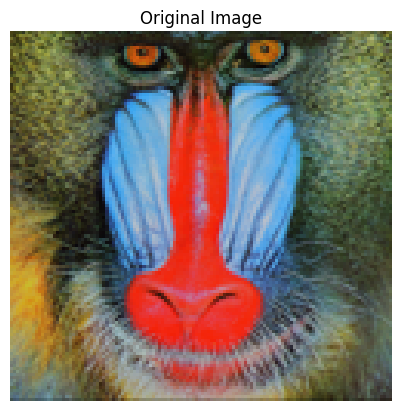

In [62]:
# Plotting Original Resolution image
plot_image(tf.squeeze(hr_image), title="Original Image")
save_image(tf.squeeze(hr_image), filename="./data/Original Image")

In [5]:

model = tf.saved_model.load(SAVED_MODEL_PATH)

In [66]:
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 0.924637


Saved as ./data/Super Resolution.jpg


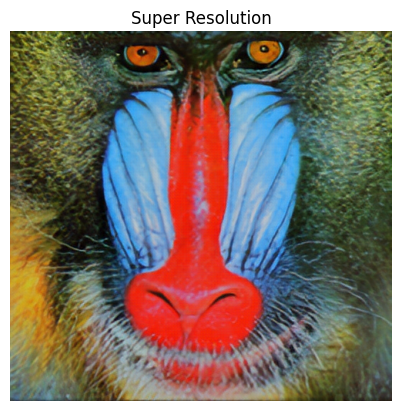

In [70]:
# Plotting Super Resolution Image
plot_image(tf.squeeze(fake_image), title="Super Resolution")
save_image(tf.squeeze(fake_image), filename="./data/Super Resolution")

In [12]:
# Declaring Constants
IMAGE_PATH = "./data/example3.png"
SAVED_MODEL_PATH = "./model/esrgan-tf2_1"
hr_image = preprocess_image(IMAGE_PATH)

Saved as ./data/Example3 Original Image.jpg


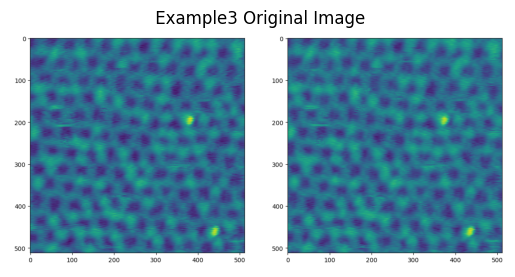

In [13]:
# Plotting Original Resolution image
plot_image(tf.squeeze(hr_image), title=" Example3 Original Image")
save_image(tf.squeeze(hr_image), filename="./data/Example3 Original Image")

In [14]:
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 21.660775


Saved as ./data/Example3 Super Resolution.jpg


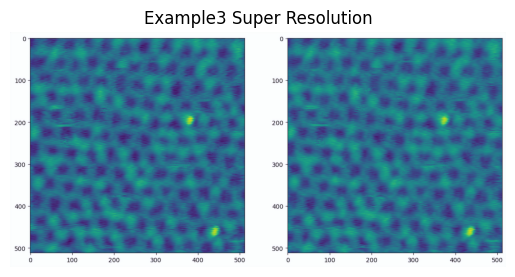

In [15]:
# Plotting Super Resolution Image
plot_image(tf.squeeze(fake_image), title="Example3 Super Resolution")
save_image(tf.squeeze(fake_image), filename="./data/Example3 Super Resolution")

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the pre-trained ESRGAN model from TensorFlow Hub
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
esrgan_model = hub.load(SAVED_MODEL_PATH)

# Create a new classification layer for your specific task
# Replace 'num_classes' with the number of classes in your dataset
num_classes = 10
classification_layer = tf.keras.layers.Dense(num_classes, activation='softmax')

# Combine the ESRGAN base model with the new classification layer
model = tf.keras.Sequential([
    esrgan_model,             # Pre-trained ESRGAN model
    classification_layer      # New classification layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on your own dataset (replace train_dataset and val_dataset)
model.fit(train_dataset, epochs=5, validation_data=val_dataset)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")

![image](image_from_paper/Real_ESRGAN.png)

In [1]:
def Blur_image():
    pass

zsh:1: unknown file attribute: i


In [12]:
from os.path import join
import pySPM
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from scipy.ndimage import gaussian_filter
from scipy.fft import fftshift, fft2,ifftshift,ifft2,fft,fftfreq
from scipy.signal import hann
from sklearn import preprocessing as pre
from skimage import filters

In [13]:
def read_file(filePath):
    SXMfile=pySPM.SXM(filePath)
    header=SXMfile.header
    Bias=header['BIAS'][0][0]
    Curr=header['Z-CONTROLLER'][1][3]
    Z_image=SXMfile.get_channel('Z')
    #Z_image.correct_median_diff()
    Z_image.correct_lines()
    x_n,y_n=Z_image.size["real"]["x"]*1e9,Z_image.size["real"]["y"]*1e9
    y_p,x_p=Z_image.size["pixels"]["y"],Z_image.size["pixels"]["x"]
    print("the file is {0},\r\nthe Bias is {1} V,the current is {4} A, the size is {2}*{2} nm,the resolution is {3}*{3} pix ".format(filePath,float(Bias),int(x_n),x_p,Curr))
    return Z_image,x_n

the file is ../../../STMdata/20221206/SiC038.sxm,
the Bias is -0.18 V,the current is 8.000E-11 A, the size is 5*5 nm,the resolution is 512*512 pix 


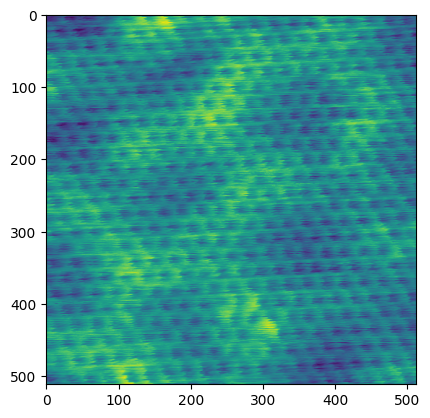

In [17]:
mydir,myFolder,fileName="../../../STMdata","20221206","SiC038.sxm"
filePath=join(mydir,myFolder,fileName)
Z_image,x_n=read_file(filePath)
y_n=x_n
image=Z_image.pixels[::-1,::]
plt.imshow(image)

In [15]:
import cv2
import numpy as np
from scipy.signal import convolve2d

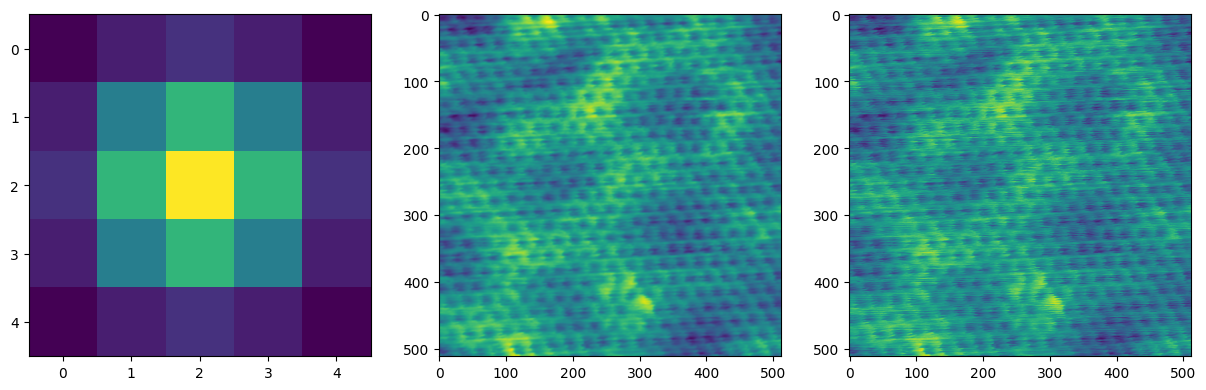

In [28]:
fig,ax=plt.subplots(1,3,figsize=(15,22))
# Define the kernel size (must be an odd number)
kernel_size = 5

# Generate a 2D Gaussian blur kernel
blur_kernel = cv2.getGaussianKernel(kernel_size, 0)

# Create a 2D Gaussian blur filter
gaussian_blur_filter = np.outer(blur_kernel, blur_kernel)

# Normalize the kernel
gaussian_blur_filter /= np.sum(gaussian_blur_filter)
ax[0].imshow(gaussian_blur_filter)
blurred_image = cv2.filter2D(image, -1, gaussian_blur_filter)
ax[1].imshow(blurred_image)
ax[2].imshow(image)


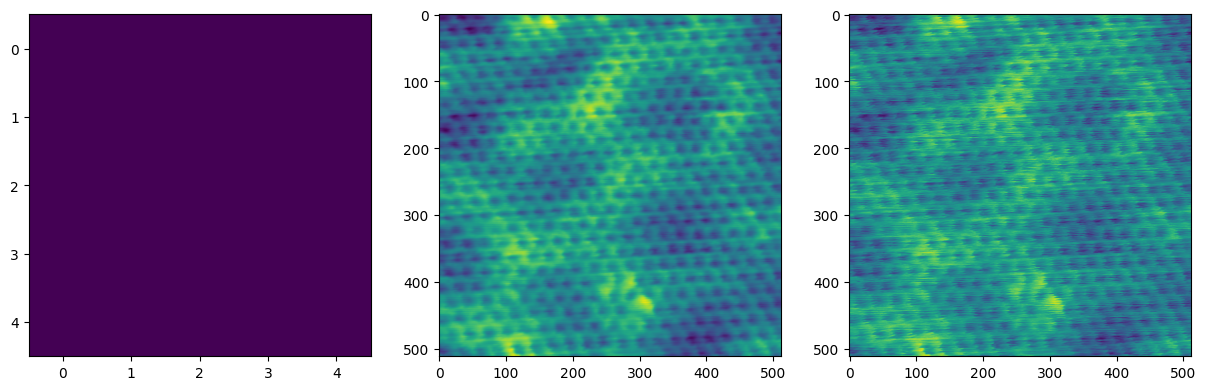

In [30]:
fig,ax=plt.subplots(1,3,figsize=(15,22))
# Define the kernel size (must be an odd number)


kernel_size = 5

# Create a box blur kernel
blur_kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)
ax[0].imshow(blur_kernel)
blurred_image = cv2.filter2D(image, -1, blur_kernel)

ax[1].imshow(blurred_image)
ax[2].imshow(image)

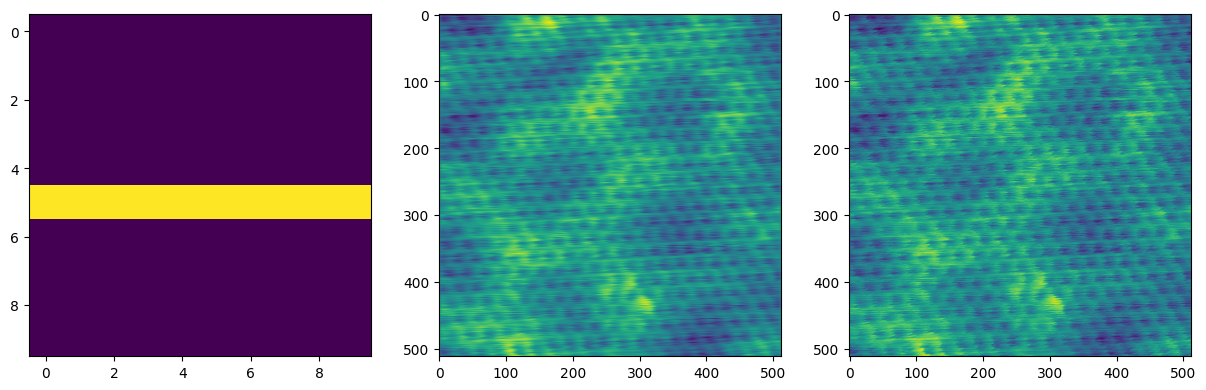

In [31]:
fig,ax=plt.subplots(1,3,figsize=(15,22))
# Define the kernel size (must be an odd number)


# Define the length and angle of motion blur
kernel_length = 10
kernel_angle = 45  # Angle in degrees

# Create a motion blur kernel
motion_blur_kernel = np.zeros((kernel_length, kernel_length))
row, col = kernel_length // 2, kernel_length // 2
motion_blur_kernel[row, :] = np.sin(np.deg2rad(kernel_angle))
motion_blur_kernel[row, col] = np.cos(np.deg2rad(kernel_angle))
motion_blur_kernel /= np.sum(motion_blur_kernel)
ax[0].imshow(motion_blur_kernel)
blurred_image = convolve2d(image, motion_blur_kernel, mode='same')

ax[1].imshow(blurred_image)
ax[2].imshow(image)

In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

mydir,myFolder,fileName="../../../STMdata","20221206","SiC038.sxm"
filePath=join(mydir,myFolder,fileName)
Z_image,x_n=read_file(filePath)
y_n=x_n
image=Z_image.pixels[::-1,::]
image_size=np.array(image).shape[0]

# 1. Gaussian Noise
mean = 0
stddev = 25
gaussian_noise = np.random.normal(mean, stddev, image_size).astype(np.float32)
noisy_image_gaussian = cv2.add(image.astype(np.float32), gaussian_noise.astype(np.float32)).astype(np.float32)

# 2. Salt and Pepper Noise
noise_density = 0.02  # Adjust as needed (proportion of noisy pixels)
salt_and_pepper = np.random.rand(*image_size) < noise_density
noisy_pixels = np.random.randint(0, 2, image_size)
noisy_image_sp = image.copy()
noisy_image_sp[salt_and_pepper] = noisy_pixels[salt_and_pepper] * 255

# 3. Speckle Noise
speckle_stddev = 0.1  # Adjust as needed
speckle_noise = np.random.normal(0, speckle_stddev, image_size).astype(np.uint8)
noisy_image_speckle = image + speckle_noise

# 4. Poisson Noise
intensity = 50  # Adjust as needed (mean intensity)
poisson_noise = np.random.poisson(intensity, image_size).astype(np.uint8)
noisy_image_poisson = cv2.add(image, poisson_noise)

# 5. Quantization Noise (8-bit)
quantization_levels = 256  # 8-bit quantization
quantization_noise = np.random.randint(0, quantization_levels, image_size, dtype=np.uint8)
noisy_image_quantization = cv2.add(image, quantization_noise)

# 6. Gaussian Blur Noise
blur_kernel_size = 5
blur_kernel = np.ones((blur_kernel_size, blur_kernel_size), dtype=np.float32) / (blur_kernel_size ** 2)
blurred_image = cv2.filter2D(image, -1, blur_kernel)

# 7. Color Noise (RGB channels)
color_noise = np.random.randint(0, 256, (image_size[0], image_size[1], 3), dtype=np.uint8)
noisy_image_color = cv2.add(image, color_noise)

# 8. Periodic Noise
periodic_noise = np.sin(np.linspace(0, 2 * np.pi, image_size[0])) * 50
noisy_image_periodic = image + periodic_noise.astype(np.uint8)

# Display the images
plt.figure(figsize=(16, 14))

plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title('Gaussian Noise')
plt.imshow(noisy_image_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Salt and Pepper Noise')
plt.imshow(noisy_image_sp, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title('Speckle Noise')
plt.imshow(noisy_image_speckle, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title('Poisson Noise')
plt.imshow(noisy_image_poisson, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title('Quantization Noise')
plt.imshow(noisy_image_quantization, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title('Gaussian Blur Noise')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.title('Color Noise')
plt.imshow(noisy_image_color)
plt.axis('off')

plt.subplot(3, 3, 9)
plt.title('Periodic Noise')
plt.imshow(noisy_image_periodic, cmap='gray')
plt.axis('off')

plt.show()


the file is ../../../STMdata/20221206/SiC038.sxm,
the Bias is -0.18 V,the current is 8.000E-11 A, the size is 5*5 nm,the resolution is 512*512 pix 


TypeError: RandomState.rand() argument after * must be an iterable, not int